In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib widget

In [2]:
"""
Q1
objective: find vectors h, e
two-body problem, not necessarily at periapsis"""
#1a
r = Matrix([0,2,0])
v = Matrix([-1,1,0])/np.sqrt(2)
mu = 1


#following Lecture 6 example 2
h = r.cross(v) #not sure if this is always true even if it's not at periapsis?
print(f"1a angular momentum: {h}")

v_mag = v.norm()
r_mag = r.norm()
e = (v_mag**2/mu - 1/r_mag)*r - 1/mu*(r.dot(v))*v
print(f"1a eccentricity: {e}")

print(f"1a dot: {h.dot(e)}")

#1b
a = 1/(2/r_mag - v_mag**2/mu)
e_mag = e.norm()
h_mag = h.norm()
print(f"semimajor axis: {a}")
print(f"eccentricity (mag): {e_mag}")
print(f"angular momentum (mag): {h_mag}")

#1c
# f = np.arccos(r.dot(e)/(r_mag*e_mag))
# print(f"1c f:{f}")
print(r.dot(e))
#equals 0, thus arccos = 0 and angle = 0 degrees???
#or...
f = np.arccos(float(h_mag**2/r_mag - 1)) #use atan2
print(f"1c true anomaly: {np.rad2deg(f)}")

#1d: Vis-Viva
r_32 = 32
# 2/r_32 - 1/a
v_32 = np.sqrt(float(2/r_32 - 1/a))
print(f"1d: {v_32}")

#1e
# r = h_mag**2 / (1+cos(f))
f_32 = np.arccos(float(h_mag**2/r_32 - 1))
print(f"1e true anomaly: {np.rad2deg(f_32)}") #use atan2
print(f"{h_mag**2/r_32 - 1} since this is negative, it can be in either 2nd or 3rd quadrant") 
print(f"1e Other true anomaly: {360-np.rad2deg(f_32)}") 

1a angular momentum: Matrix([[0], [0], [1.41421356237309]])
1a eccentricity: Matrix([[1.00000000000000], [-2.22044604925031e-16], [0]])
1a dot: 0
semimajor axis: 4.50359962737050E+15
eccentricity (mag): 1.00000000000000
angular momentum (mag): 1.41421356237309
-4.44089209850063e-16
1c true anomaly: 90.00000000000001
1d: 0.24999999999999956
1e true anomaly: 159.6358651936822
-0.937500000000000 since this is negative, it can be in either 2nd or 3rd quadrant
1e Other true anomaly: 200.3641348063178


In [3]:
"""
Q2 find eccentricity and true anomaly
"""
rEarth = 6378 #km
rdot = 3.5 #km/s
rfdot = 7
mu = 3.986e5 #can we assume Mu of earth???
r = Matrix([rEarth + 600,0,0]) #polar coords
v = Matrix([rdot,rfdot,0])
h = r.cross(v)
r_mag = r.norm()
h_mag = h.norm()
v_mag = v.norm()

# # mu, e, f, a = symbols("mu, e, f, a")
e, f, a = symbols("e,f,a")
eq1 = Eq(h_mag, sqrt(mu*a*(1-e**2)))
"""
h_mag**2/(mu*a)
"""
eq2 = Eq(v_mag, sqrt(mu*(2/r_mag - 1/a)))
eq3 = Eq(r_mag, h_mag**2/mu * 1/(1 + e*cos(f)))
# # eq4 = Eq(r_mag, a*(1-e**2)/(1+e*cos(f)))
# # solve([eq1,eq2,eq3,eq4],[mu, e, f, a])
sol = solve([eq1,eq2,eq3],[e, f, a])
sol
print(f"eccentricity: {sol[2][0]}")
print(f"true anomaly: {np.rad2deg(float(sol[2][1]))}")
# a = 1/(2/r_mag - v_mag**2/mu)
# e = np.sqrt(float(1-h_mag**2/(mu*a)))
# e
print(h)
sol[2][2]

eccentricity: 0.451859611629567
true anomaly: 108.3416960533151
Matrix([[0], [0], [48846]])


7521.49703553972

semimajor: 7999.7718346901265
angular momentum : [ 5.12726000e-01 -9.72508456e+03  5.51750608e+04]
angular momentum mag: 56025.5710066523
eccentricity: 0.12502617428332868
eccentricity: 0.1250261742833292
init eccentric anomaly: 2.98670126391651
Mean Motion (rad/s): 0.0008823730731084429
Mean Anomaly (rad): 9.529629189571184
Newton's Method for 3.8:
0 9.529629189571184 2.98670126391651
1 0.9171728017173386 11.468570284091385
2 0.04028879439886701 12.441136928996546
3 1.450390369939214e-05 12.487131172857756
4 1.3571366253017914e-12 12.48714774181462
Eccentric Anomaly after Newton's Method: 12.487147741816171
F coefficient: -0.7775578529665359
G coefficient: -52.60089867824354


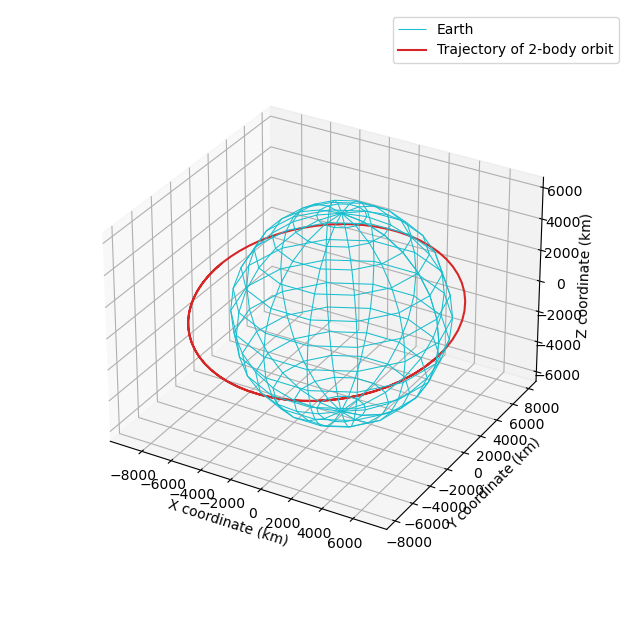

Final r(t): [6974.32074327 -620.5422465  -109.44078081]
F dot: 6.782328948384238e-05
G dot: -1.2814897698225916
Final v(t): [0.64043932 7.85419013 1.3843634 ]


In [6]:
"""
Q3 plot orbit
End goal: Plot the radius vector of orbit from t = 0 to t = 3 hours (plus make snazzy Earth wireframe lol)
"""
import matplotlib.pyplot as plt
r0 = np.array([-8903.833, 1208.356, 213.066]) #km
v0 = np.array([-0.971, -6.065, -1.069]) #km/s
mu = 398600 #km^3/s^2
R = 6378 #km
tf = 3600*3

r0_mag = np.linalg.norm(r0)
v0_mag = np.linalg.norm(v0)
a = 1/(2/r0_mag - v0_mag**2/mu)
print(f"semimajor: {a}")
h = np.cross(r0,v0)
print(f"angular momentum : {h}")
h_mag = np.linalg.norm(h)
print(f"angular momentum mag: {h_mag}")
e_mag = np.sqrt(float(1-h_mag**2/(mu*a)))
e = (v0_mag**2/mu - 1/r0_mag)*r0 - 1/mu*(r0.dot(v0))*v0
print(f"eccentricity: {e_mag}")
print(f"eccentricity: {np.linalg.norm(e)}")
# E0 = 0
E0 = np.arccos((1-r0_mag/a)*1/e_mag) #lecture 5 page 15
print(f"init eccentric anomaly: {E0}")
n = np.sqrt(mu/a**3) #lecture 5 page 19
print(f"Mean Motion (rad/s): {n}")
M = n*tf #measure same mean anomaly by delta T, We only care about the change
#M = n*(t-tp), tp = time at periapse
#M = n*deltat + M0 = ~12.49
#Lecture 5 slide 13
#delta t = t-t0 = (t-tp) - (t0-tp)
#You're offsetting by the original
print(f"Mean Anomaly (rad): {M}")

num_points = 100

t = np.linspace(0, tf, num_points)

#Newton's Method
E1 = E0
g = 1 #when g <= tol, it would work
itr = 0 #iteration counter
tol = 1e-10
print("Newton's Method for 3.8:")
while(abs(g) > tol): #see Lecture 4
# for i in range(4):
    g = M + (E0-e_mag*np.sin(E0)) - (E1-e_mag*np.sin(E1))
    dg_dE = -1 + e_mag*np.cos(E1) #derivative dg over dE
    E_fin = E1 - g/dg_dE
    print(itr,g,E1)
    E1 = E_fin
    itr = itr+1
print(f"Eccentric Anomaly after Newton's Method: {E_fin}")
# print(itr)
#recalculating E to use in F and G
E_list = E0
for i in range(itr):
    g_graph = n*t + E0-e_mag*np.sin(E0) - (E_list-e_mag*np.sin(E_list))
    dg_dE_graph = -1 + e_mag*np.cos(E_list)
    E_list = E_list - g_graph/dg_dE_graph
    E = E_list
#what is newton's method? look at lecture 4?
F = 1 - (a/r0_mag)*(1-np.cos(E-E0))
G = t - np.sqrt(a**3/mu)*( (E-E0) - np.sin(E-E0))

print(f"F coefficient: {F[-1]}")
print(f"G coefficient: {G[-1]}")

rlist = []
for i in range(num_points):
    rlist.append(F[i]*r0 + G[i]*v0)
rlist = np.array(rlist)
# print(rlist.shape)
# print(rlist)
xlist = rlist[:,0]
ylist = rlist[:,1]
zlist = rlist[:,2]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

#wireframe earth linspace 15
#replace surface w/ wireframe
theta = np.linspace(0, 2.*np.pi, 15)
phi = np.linspace(0, np.pi, 15)
#convert from polar to cartesian coords
x = R * np.outer(np.cos(theta), np.sin(phi))
y = R * np.outer(np.sin(theta), np.sin(phi))
z = R * np.outer(np.ones(np.size(theta)), np.cos(phi))
ax.plot_wireframe(x, y, z, color='tab:cyan', label = "Earth", linewidth = 0.75)

ax.plot(xlist,ylist,zlist, color='tab:red', label = "Trajectory of 2-body orbit")
ax.set_xlabel("X coordinate (km)")
ax.set_ylabel("Y coordinate (km)")
ax.set_zlabel("Z coordinate (km)")

# fig = plt.figure(constrained_layout=True)
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.legend()
# plt.tight_layout()
fig1 = plt.gcf()
fig1.savefig('hw1_q3.png', dpi=300, bbox_inches="tight")
plt.show()


r = rlist[-1]
print(f"Final r(t): {r}")
r_mag = np.linalg.norm(r)

F_dot = -np.sqrt(mu*a)/(r_mag*r0_mag)*np.sin(E_fin-E0) #lecture 6 page 4
print(f"F dot: {F_dot}")
G_dot = 1 - a/r_mag * (1-np.cos(E_fin - E0))
print(f"G dot: {G_dot}")

v = F_dot*r0 + G_dot*v0
print(f"Final v(t): {v}")
#tolerance for the method doesn't matter 1e-8

#lec 5 pg 19 for fdot and gdot





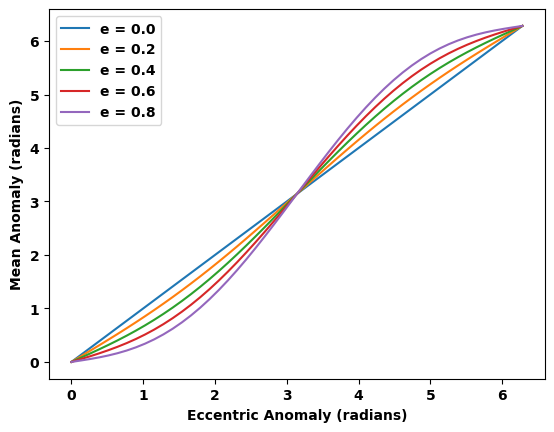

In [5]:
"""
Q4
"""
def meanAnomaly(eccentricAnomaly,eccentricity):
    return eccentricAnomaly - eccentricity*np.sin(eccentricAnomaly)
    

E = np.linspace(0,2*np.pi)
df=pd.DataFrame({'eccentric': E, 'e = 0.0': meanAnomaly(E,0.0), 'e = 0.2': meanAnomaly(E,0.2), 'e = 0.4': meanAnomaly(E,0.4), 'e = 0.6': meanAnomaly(E,0.6), 'e = 0.8': meanAnomaly(E,0.8) })
plt.plot('eccentric','e = 0.0',data=df)
plt.plot('eccentric','e = 0.2',data=df)
plt.plot('eccentric','e = 0.4',data=df)
plt.plot('eccentric','e = 0.6',data=df)
plt.plot('eccentric','e = 0.8',data=df)
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.xlabel('Eccentric Anomaly (radians)',weight = 'bold')
plt.ylabel('Mean Anomaly (radians)',weight = 'bold')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.savefig('hw1_q4.png', dpi=300, bbox_inches="tight")